# **Sentiment Analysis on the IMDB movie reviews**

## **Context**

The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. Each Sentence has been parsed into many phrases by the Stanford parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data.

train.tsv contains the phrases and their associated sentiment labels. We have additionally provided a SentenceId so that you can track which phrases belong to a single sentence.
test.tsv contains just phrases. You must assign a sentiment label to each phrase.
The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

## **Objective**

The dataset contains approximately 16,000 movie reviews. The objective is to do Sentiment Analysis(positive/negative) for the movie reviews using Deep Learning Sequential model Long short term Memory (LSTM) different techniques and observe the accurate results.


## **Data Dictionary**
- **Phrases:** reviews of the movies.
- **sentiment:** indicates the sentiment of the review 0 or 1( 0 is for negative review and 1 for positive review)        

## **Importing the libraries**

In [2]:
#!pip install contractions

In [3]:
#!pip install nltk

In [4]:
#!pip install wordcloud

In [5]:
#!pip install scikit-learn

In [6]:
#!pip install seaborn

In [7]:
# Importing the required the libraries

# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# Helps to extract the data using regular expressions
import re

# Helps to remove the punctuation
import string

# It helps to remove the accented characters

#import unidecode

# Importing the NLTK library
import nltk

nltk.download('omw-1.4')
# # downloading vader lexicon
# nltk.download('vader_lexicon')
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Used in Stemming
from nltk.stem.porter import PorterStemmer


# Used in Lemmatization
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading the dataset**

In [3]:
# Loading data into pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/sent_a/sentiment analysis data.csv")

In [4]:
# Creating the copy of the data frame
df = data.copy()

In [5]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Sent_count
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,188
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,77
2,3,1,A series,2,8
3,5,1,series,2,6
4,6,1,of escapades demonstrating the adage that what is good for the goose,2,68


In [6]:
df["SentenceId"].nunique()

8529

## **Overview of the dataset**

In [7]:
df.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment', 'Sent_count'], dtype='object')

- we are interested in the 'Phrase' and 'Sentiment' columns

In [8]:
df = df.loc[:, ["Phrase", "Sentiment"]]

In [9]:
df["Sentiment"].unique()

array([1, 2, 3, 4, 0])

* The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

### **Understand the shape of the dataset**

In [10]:
# Print shape of data
df.shape

(156015, 2)

### **Check the data types of the columns for the dataset**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156015 entries, 0 to 156014
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Phrase     156015 non-null  object
 1   Sentiment  156015 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


**Observations:**

* Data has 156,015 rows and 2 columns.
* Both the columns are object type.
* There are no null values present in the dataset.

### **Checking for duplicate values**

In [12]:
# checking for duplicate values
df.duplicated().sum()

0

* There are no duplicate values present in the data .

## **Exploratory Data Analysis**

**Word Cloud for cleaned Negative Reviews**

A word cloud in sentiment analysis visually represents the most frequent words in a text dataset. The size of each word indicates its frequency or importance. This tool helps quickly identify prominent terms and patterns, aiding in understanding the general themes and sentiment. Positive and negative words can be distinguished by color coding, providing an intuitive overview of the sentiment distribution in the analyzed text.

In [13]:
# Creating word cloud for negative reviews

# Extracting the negative reviews i.e, sentiment = 0
negative_reviews = df[df['Sentiment'] == 0]

# joining the negative reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['Phrase'])

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

In [14]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word) # The generate() function takes one argument of the text we created, helps to generate the wordcloud


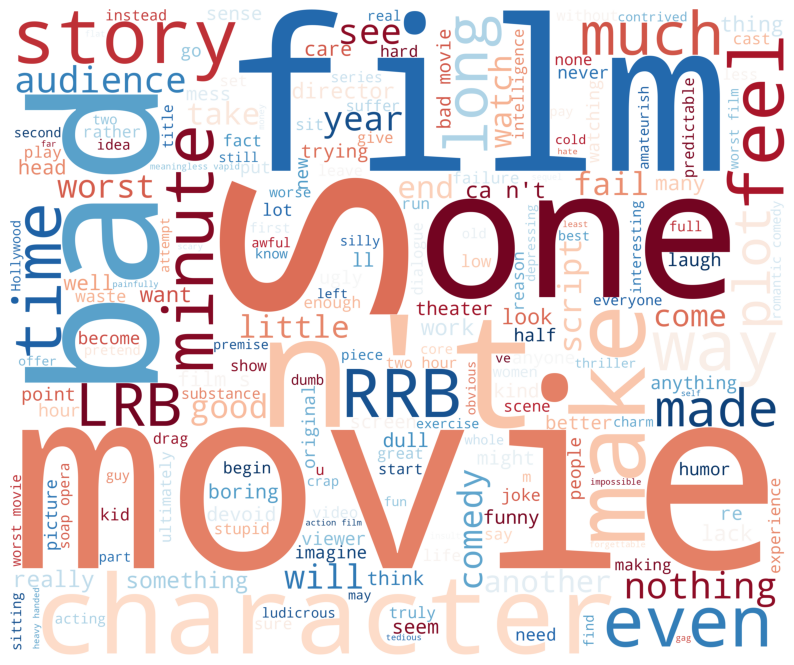

In [16]:
plt.figure(1, figsize = (10, 10))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* The **even, bad, fail, worst, little, maybe, instead, waste, still, boring** were some of the important recurring words observed in the negative reviews.

In [17]:
# check the count of each labels
df['Sentiment'].value_counts()

Sentiment
2    79539
3    32927
1    27271
4     9206
0     7072
Name: count, dtype: int64

We can observe that classes are balanced.

In [65]:
new_df = df[(df["Sentiment"] == 0) | (df["Sentiment"] == 4)]

# Map sentiment values to binary labels
new_df["Sentiment"] = new_df["Sentiment"].map({0: 0, 4: 1})

<ipython-input-65-d88c369bf1e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Sentiment"] = new_df["Sentiment"].map({0: 0, 4: 1})


In [67]:
import pandas as pd

# Assuming df is your DataFrame and is already loaded

# Select rows with sentiment 0 or 4
new_df = df[(df["Sentiment"] == 0) | (df["Sentiment"] == 4)].copy()

# Map sentiment values to binary labels using .loc to avoid the SettingWithCopyWarning
new_df.loc[:, "Sentiment"] = new_df["Sentiment"].map({0: 0, 4: 1})

# Check the shape of the new DataFrame
print("Shape of the new DataFrame:", new_df.shape)

# Check the distribution of the sentiment values
print(new_df["Sentiment"].value_counts())

# Check the first few rows of the new DataFrame
print(new_df.head())


Shape of the new DataFrame: (16278, 2)
Sentiment
1    9206
0    7072
Name: count, dtype: int64
                                                                        Phrase  \
60  This quiet , introspective and entertaining independent is worth seeking .   
63                          quiet , introspective and entertaining independent   
71                                                                entertaining   
74                                                            is worth seeking   
97                             would have a hard time sitting through this one   

    Sentiment  
60          1  
63          1  
71          1  
74          1  
97          0  


In [66]:
print("Shape of the new DataFrame:", new_df.shape)


Shape of the new DataFrame: (16278, 2)


[link text](https://)- selecting only the data that relates with the negative sentiment and the postive sentiment

In [68]:
new_df.reset_index(drop = True, inplace = True)

In [69]:
new_df.shape

(16278, 2)

### Data Preprocessing

In [70]:
# def remove_special_chars(text):
#   text = re.sub('[^a-zA-Z]', ' ', text)
#   return text

# new_df["Phrase"] = new_df["Phrase"].apply(lambda x: remove_special_chars(x))
# # data.head(2)

In [71]:
import re
def remove_special_chars(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    return text

# Create a copy of new_df to avoid SettingWithCopyWarning
new_df = new_df.copy()

# Apply the function using .loc to avoid the warning
new_df.loc[:, "Phrase"] = new_df["Phrase"].apply(remove_special_chars)

# Check the first 2 rows of the DataFrame to verify changes
new_df.head(2)

,Phrase,Sentiment
0,This quiet introspective and entertaining independent is worth seeking,1
1,quiet introspective and entertaining independent,1


In [72]:
#!pip install contractions

In [73]:
import contractions

# Let us fix the contractions in the data

def replace_contractions(text):
  return contractions.fix(text)

new_df["Phrase"] = new_df["Phrase"].apply(lambda x: replace_contractions(x))

In [74]:
nltk.download('punkt') # for tokenization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [75]:
import os
import nltk

nltk_data_path = os.path.join(nltk.data.find('tokenizers'), 'punkt.zip')
if os.path.exists(nltk_data_path):
    os.remove(nltk_data_path)


In [76]:
import nltk
# Ensure the punkt tokenizer is downloaded
nltk.download('punkt')

# downloading punkt manually and importind from the folder path
#import nltk
#nltk.data.path.append('C:/Users/DELL/AppData/Roaming/nltk_data')
#from nltk.tokenize import word_tokenize
# in case punkt refuses to download here, download it manually and paste the folder on nltk_data under hidden Appdata folder on your PC

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
new_df["Phrase"] = new_df.apply(lambda row: nltk.word_tokenize(row["Phrase"]), axis = 1)

In [78]:
def to_lowercase(row):
  words = [word.lower() for word in row]
  return words

new_df["Phrase"] = new_df["Phrase"].apply(lambda x: to_lowercase(x))


In [79]:
new_df.head(2)

,Phrase,Sentiment
0,"[this, quiet, introspective, and, entertaining, independent, is, worth, seeking]",1
1,"[quiet, introspective, and, entertaining, independent]",1


In [80]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

def remove_stopwords(row):
  words = [word for word in row if word not in stop_words]
  return words

new_df["Phrase"] = new_df["Phrase"].apply(lambda x: remove_stopwords(x))

In [82]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [83]:
## use if punkt was successfully downloaded automatically as a zip file

# from nltk.stem import PorterStemmer, WordNetLemmatizer

# lm = WordNetLemmatizer()

# ps = PorterStemmer()

# def lemmatize_words(row):
#   words = [lm.lemmatize(word) for word in row]
#   #words = [ps.stem(word) for word in row]   # for stemming
#   return words

# new_df["Phrase"] = new_df["Phrase"].apply(lambda x: lemmatize_words(x))

In [84]:
# use if punkt was manually downloaded and saved as a normal folder on the PC

lm = WordNetLemmatizer()
ps = PorterStemmer()

# Function to lemmatize words
def lemmatize_words(row):
    if isinstance(row, str):  # Ensure the input is a string
        words = word_tokenize(row)  # Tokenize the row text
        lemmatized_words = [lm.lemmatize(word) for word in words]
        # For stemming, uncomment the next line and comment the above line
        # lemmatized_words = [ps.stem(word) for word in words]
        return ' '.join(lemmatized_words)
    else:
        return row  # Return the row unchanged if it is not a string

# Apply the function to the 'Phrase' column
new_df["Phrase"] = new_df["Phrase"].apply(lemmatize_words)

# Check the output
print(new_df["Phrase"].head())

0    [quiet, introspective, entertaining, independent, worth, seeking]
1                    [quiet, introspective, entertaining, independent]
2                                                       [entertaining]
3                                                     [worth, seeking]
4                                    [would, hard, time, sitting, one]
Name: Phrase, dtype: object


### Putting All together

In [85]:
def join_words(row):
  words = " ".join([word for word in row])
  return words

new_df["Phrase"] = new_df["Phrase"].apply(lambda x: join_words(x))

In [86]:
new_df.head(3)

,Phrase,Sentiment
0,quiet introspective entertaining independent worth seeking,1
1,quiet introspective entertaining independent,1
2,entertaining,1


In [87]:
# saving the cleaned dataset for future use
new_df.to_csv("/content/drive/MyDrive/cleaned_df.csv", index = False)

## **Sequential model - LSTM**

Sequential models is a common name for Neural Network architectures, that have units with memory. Here we shall be using LSTM, which is a type of Recurrent Neural Network layer as the memory units.

A typical LSTM unit is made up of a cell, an input gate, an output gate, and a forget gate. The cell is responsible for "remembering" values over extended periods of time and "forgetting" certain values when the context changes. This allows LSTM to maintain "memory." Each of the three gates can be viewed as a Fully-Connected Artificial Neural Network, or Multi-Layer Perceptrons. They calculate an activation (using an activation function) of a weighted sum. Additionally, the input and output vectors are accompanied by a context vector that contains information about the summary of the text it has processed thus far.

Intuitively, the gates regulate the flow of values that pass through the connections of the LSTM, which is why they are referred to as "gates." They tend to output values between '1' and '0', where '1' is multiplied with the context and input vectors. The values that are multiplied with zero are forgotten and those multiplied with 1 are remembered.

**Components of the LSTM**

The LSTM cell contains the following components:

- Forget Gate “f” ( a neural network with sigmoid)
- Candidate layer “C"(a NN with Tanh)
- Input Gate “I” ( a NN with sigmoid )
- Output Gate “O”( a NN with sigmoid)
- Hidden state “H” ( a vector )
- Memory state “C” ( a vector)

Inputs to the LSTM cell at any step are Xt (current input) , Ht-1 (previous hidden state ) and Ct-1 (previous memory state).

Outputs from the LSTM cell are Ht (current hidden state ) and Ct (current memory state)



**Working of gates in LSTM**

First, LSTM cell takes the previous memory state Ct-1 and does element wise multiplication with forget gate (f) to decide if present memory state Ct. If forget gate value is 0 then previous memory state is completely forgotten else f forget gate value is 1 then previous memory state is completely passed to the cell ( Remember f gate gives values between 0 and 1 ).

Ct = Ct-1 * ft

Calculating the new memory state:

Ct = Ct + (It * C`t)

Now, we calculate the output:

Ht = tanh(Ct)

In [88]:
# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Used to create the Sequential model
from tensorflow.keras.models import Sequential
#import tensorflow as tf
# Used to create the tokens from the text data
from tensorflow.keras.preprocessing.text import Tokenizer

# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### **Tokenizing and converting the reviews into numerical vectors**

In [89]:
# Creating the tokenizer with 700 vocab size
# using only 700 vocabularies (unique words) in the dataset
tokenizer = Tokenizer(num_words = 700, split = ' ')

tokenizer.fit_on_texts(new_df['Phrase'].values)

# converting text to sequences
X = tokenizer.texts_to_sequences(new_df['Phrase'].values)
# tokenizing the sentences and converting it to sequences of integars
# the integars are positions that represent the index of each word in the original text - not one-encoded values
# Padding the sequences
X = pad_sequences(X, 100)
# 100 represents maximum length for character limit

- note that if the goal is to build an app such that users will put their input from the frontend, and then pre-processed by the machine learning engineer (you), the tokenizer responsible for converting the input to sequences must be saved

In [90]:
# saving the tokenizer on colab
import pickle

with open("/content/drive/MyDrive/sent_a//tokenizer.pkl", "wb") as handle:
   pickle.dump(tokenizer, handle)

with open("tokenizer.pkl", "wb") as handle:
  pickle.dump(tokenizer, handle)

**Model Building**

In [91]:
model = Sequential()

# model will take as input an integer matrix of size (batch, input_length), and the largest integer (i.e. word index) in the input
# should be no larger than vocabulary size. Now model.output_shape is (None, input_length, 256), where `None` is the batch dimension.
# input_length is X_data[1] = 700 here.
model.add(Embedding(700, 120, input_length = 100))

model.add(SpatialDropout1D(0.2))

 # return_sequences = True means each LSTM cell in it is outputting its value.The output of the layer is a sequence of outputs.
model.add(LSTM(150, dropout = 0.2, recurrent_dropout = 0.2))

model.add(Dense(2, activation = 'sigmoid'))

# compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [92]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=700, output_dim=120, input_length=100))

# Spatial Dropout layer
model.add(SpatialDropout1D(0.2))

# LSTM layer with parameters set to be compatible with cuDNN
model.add(LSTM(150, dropout=0.2, recurrent_dropout=0,
               activation='tanh', recurrent_activation='sigmoid',
               use_bias=True, unit_forget_bias=True))

# Dense layer
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [93]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 120)          84000     
                                                                 
 spatial_dropout1d_1 (Spati  (None, 100, 120)          0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 150)               162600    
                                                                 
 dense_1 (Dense)             (None, 2)                 302       
                                                                 
Total params: 246902 (964.46 KB)
Trainable params: 246902 (964.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


A sequential model is constructed by adding various layers to it.

- The first layer is the Embedding layer which transforms one-hot encoded sparse vectors into Word Embedding vectors. As the model continues to train, the weights of the Embedding layer are adjusted so that words with similar meanings are located closer together in the vector space, or have similar Word Embedding Vectors. For example, "orange" would be located near "tangerine" and "queen" would be near "empress." The vocabulary size is specified.

- The subsequent layer is an LSTM layer with 150 neurons. The input for this layer is a list of sentences, where each word has been converted to its corresponding Embedding vector and padded to have the same length. The activation function used is ReLU, which is widely used, but other relevant activation functions can also be used.

- To prevent bias, a dropout layer is employed to regulate the network.

- The final layer is a Dense layer which serves as the output layer and has 2 cells to perform classification, representing the 2 different categories in this example.

- The model is then compiled using the Adam optimizer and categorical cross-entropy. The Adam optimizer is currently the best choice for handling sparse gradients and noisy problems, and categorical cross-entropy is typically used when the classes are mutually exclusive, meaning each sample belongs to exactly one class.

**Splitting the Data**

In [94]:
new_df["Sentiment"].replace(4, 1, inplace = True)
# because we are only using two classes; 4 representing positive

In [95]:
# creating the target feature
y = new_df["Sentiment"]

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [96]:
from tensorflow.keras.utils import to_categorical

In [97]:
y_train_enc = to_categorical(y_train, 2)
y_test_enc = to_categorical(y_test, 2)

**Training the model**

In [98]:
model_path = "/content/drive/MyDrive/sent_a/nlp_model.h5"
#model_path = "nlp_model.keras"

es = EarlyStopping(patience=3, verbose=2, monitor = "val_loss")
#chkpt = ModelCheckpoint(model_path, verbose = 2, save_best_only = True)


In [99]:
y_train_enc

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [100]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()


In [101]:
# specifying the batch size
batch_size = 32

# fitting the model on the training data with 10 epochs
#history = model.fit(X_train, y_train_enc, epochs = 10, batch_size = batch_size, callbacks=[es, chkpt],verbose = 1,
#                validation_split = 0.1)

history = model.fit(X_train, y_train_enc, epochs = 10, batch_size = batch_size,verbose = 1,
                validation_split = 0.1)

Epoch 1/10
413/413 [==============================] - 14s 29ms/step - loss: 0.4356 - accuracy: 0.7791 - val_loss: 0.3112 - val_accuracy: 0.8587
Epoch 2/10
413/413 [==============================] - 4s 9ms/step - loss: 0.3100 - accuracy: 0.8532 - val_loss: 0.2938 - val_accuracy: 0.8676
Epoch 3/10
413/413 [==============================] - 4s 10ms/step - loss: 0.2933 - accuracy: 0.8603 - val_loss: 0.2850 - val_accuracy: 0.8648
Epoch 4/10
413/413 [==============================] - 5s 11ms/step - loss: 0.2728 - accuracy: 0.8695 - val_loss: 0.2907 - val_accuracy: 0.8614
Epoch 5/10
413/413 [==============================] - 3s 8ms/step - loss: 0.2548 - accuracy: 0.8777 - val_loss: 0.2916 - val_accuracy: 0.8635
Epoch 6/10
413/413 [==============================] - 3s 8ms/step - loss: 0.2393 - accuracy: 0.8844 - val_loss: 0.2867 - val_accuracy: 0.8628
Epoch 7/10
413/413 [==============================] - 4s 8ms/step - loss: 0.2276 - accuracy: 0.8890 - val_loss: 0.2943 - val_accuracy: 0.8621
Ep

In [1]:
# saving the model
#model_path = "/content/drive/MyDrive/sent_a/model.keras"

#model.save(model_path)


In [103]:
len(y_test_enc)

1628

### Testing

In [157]:
from tensorflow.keras.preprocessing.text import Tokenizer # not used
from tensorflow.keras.preprocessing.sequence import pad_sequences

# always use the tokenizer generated from your training and not the one imported - to prevent wrong predictions
# let's load the tokenizer from the path
with open('/content/drive/MyDrive/sent_a/tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# def preprocess_text(text):
#     # Tokenize the text
#     tokens = tokenizer.texts_to_sequences([text])
#     # Pad the sequences to a fixed length
#     padded_tokens = pad_sequences(tokens, maxlen=100)
#     return padded_tokens[0] # for single

def preprocess_text(text):
    # Tokenize the text
    tokens = tokenizer.texts_to_sequences([text])
    # Pad the sequences to a fixed length
    padded_tokens = pad_sequences(tokens, maxlen=100)
    return padded_tokens # for single and multiple texts

# Example of a random text for testing
input_text = "This product was good and worth the price."
processed_input = preprocess_text(input_text)

# Reshape processed_input to match the model's expected input shape (1, sequence_length)
#processed_input = np.reshape(processed_input, (1, -1))

# Make predictions
prediction = model.predict(processed_input)

# Convert predicted probabilities to sentiment labels (assuming binary classification)
sentiment = "Negative" if prediction[0][0] > 0.5 else "Positive"

print(f"Prediction probabilities: {prediction}")
print(f"The sentiment of the text '{input_text}' is predicted as: {sentiment}")


1/1 [==============================] - 0s 28ms/step
Prediction probabilities: [[0.00730381 0.9934    ]]
The sentiment of the text 'This product was good and worth the price.' is predicted as: Positive


In [158]:
# Test with different input texts
test_texts = [
    "This product was good and worth the price.",
    "I hated this product, it was a waste of money.",
    "Excellent quality, I am very satisfied with this purchase.",
    "Terrible experience, will not buy again.",
    "The item is okay, not great but not bad either.",
    "Fantastic service, highly recommend!",
    "Bad quality, completely disappointed.",
    "Great value for the price, very happy with it."
]

for input_text in test_texts:
    processed_input = preprocess_text(input_text)
    # Make predictions
    prediction = model.predict(processed_input)
    # Convert predicted probabilities to sentiment labels
    sentiment = "Negative" if prediction[0][0] > 0.5 else "Positive"
    # Debug: Print the raw prediction probabilities and sentiment
    print(f"Text: '{input_text}'")
    print(f"Prediction probabilities: {prediction}")
    print(f"The sentiment of the text is predicted as: {sentiment}\n")


1/1 [==============================] - 0s 21ms/step
Text: 'This product was good and worth the price.'
Prediction probabilities: [[0.00730381 0.9934    ]]
The sentiment of the text is predicted as: Positive

1/1 [==============================] - 0s 18ms/step
Text: 'I hated this product, it was a waste of money.'
Prediction probabilities: [[9.9999857e-01 1.1652944e-06]]
The sentiment of the text is predicted as: Negative

1/1 [==============================] - 0s 18ms/step
Text: 'Excellent quality, I am very satisfied with this purchase.'
Prediction probabilities: [[5.5643712e-05 9.9994373e-01]]
The sentiment of the text is predicted as: Positive

1/1 [==============================] - 0s 18ms/step
Text: 'Terrible experience, will not buy again.'
Prediction probabilities: [[0.9972698  0.00267904]]
The sentiment of the text is predicted as: Negative

1/1 [==============================] - 0s 17ms/step
Text: 'The item is okay, not great but not bad either.'
Prediction probabilities: [[9.

In [164]:
# Preprocess function
def preprocess_text(text):
    tokens = tokenizer.texts_to_sequences([text])
    padded_tokens = pad_sequences(tokens, maxlen=100)
    return padded_tokens[0]  # Return the padded sequence as a 1D array

# Convert X_test to a list of strings if it's not already
X_test = X_test.astype(str).tolist() if isinstance(X_test, np.ndarray) else X_test

# Preprocess all texts in X_test and store them in a list
X_test_processed = []
for text in X_test:
    processed_text = preprocess_text(text)
    X_test_processed.append(processed_text)

# Convert list of processed texts to numpy array
X_test_processed = np.array(X_test_processed)

# Predict on X_test
y_pred_probs = model.predict(X_test_processed)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert y_test_enc (if it's one-hot encoded) to 1D array
y_test = np.argmax(y_test_enc, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Print confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_mat)


51/51 [==============================] - 0s 5ms/step
Accuracy: 0.4287
              precision    recall  f1-score   support

    Negative       0.43      1.00      0.60       698
    Positive       0.00      0.00      0.00       930

    accuracy                           0.43      1628
   macro avg       0.21      0.50      0.30      1628
weighted avg       0.18      0.43      0.26      1628

Confusion Matrix:
[[698   0]
 [930   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Deployment with Streamlit, Git, Docker and Render

this will be done using anaconda prompt, Visual Studio code, streamlit, dockker and Render


# Building streamlit app using VS code and Anaconda Prompt

**Streamlit**

Alternatives: Dash, Shiny

Streamlit is a Python package that allows you to create web apps for machine learning and data science projects with minimal code. By writing simple Python scripts, Streamlit helps you visualize data and create interactive applications quickly and easily. To access streamlit effectively we can use either VS Code or Spyder

1. VS Code - more versalite and works with many languages

Visual Studio Code (VS Code) is a versatile and highly customizable code editor developed by Microsoft. It supports a wide range of programming languages and is known for its rich ecosystem of extensions, which enhance functionality. It's widely used for web development, data science, and general programming, offering features like debugging, version control, and integrated terminals.


2. Spyder - Python only -  focused on the needs of data scientists and researchers

Spyder (Scientific Python Development Environment) is an open-source IDE specifically designed for data science and scientific computing. It integrates with popular scientific libraries like NumPy, SciPy, and Matplotlib, providing a powerful environment for developing and debugging Python scripts. It features a code editor, variable explorer, and interactive console.


- for this project, we will be using VS code


In [ ]:
On anaconda prompt

# create conda environment
conda create -n mlopz python=3.9 pip -y
# mlopz is environment name; always install python and pip. using version 3.9 since it works well with tensorflow
# -y is yes so as to install all the necessary packages automatically

# check all the environment you have
conda info --envs

# activate the one you want to use
conda activate mlops

# install tensorflow: version used to build model is version: 2.15.0
conda install tensorflow==2.15.0
pip install tensorflow==2.15.0


# install streamlit
pip install streamlit

# clear session
cls


# change to model's directory
cd sent_a

# switch to vc code
code

# run the streamlit app created on vs code
streamlit run app.py

# to prevent tensorflow and embedding errors, ensure you are using a model format that is compatible with your local PC version
# hence, model should be saved as h5 and not as a keras. model.h5 should be used

## Tracking of version and linking files to Github in preparation for deployment
**Git** (Alternatives: Mercurial, Subversion (SVN)
)

Git is a version control system that tracks changes to your code over time. It enables multiple collaborators to work on the same project simultaneously, keeping track of who made changes and when. Git helps prevent conflicts and allows you to revert to previous versions of your code if necessary.

In [ ]:
## download git on google and switch to anaconda prompt
# after the above, install pipreqs on prompt to generate requirement.txt

conda activate mlopz

pip install pipreqs
pipreqs --encoding=utf8 # might not work; you can try
pip freeze > requirements.txt

# enter directory
cd sent_a

# next is to upload files from local PC to git repository; this is done using git. download it
git init

# add all files to the hidden folder created from git init
git add .

# commit
git config user.name "John Doe"
git config user.email "john.doe@example.com"
git commit -m "initial commit"


# connect your newly created respository; go to github create a new resposity and copy the line starting from remote
git remote add origin https://github.com/Oshokz/testing.git

# push
git push -u origin master

# refresh the repository; the files have been updated


## Storing all the necessary dependencies and configuration of the web app in a container

**Docker** (Alternatives: Kubernetes, Podman)

Docker is a platform for developing, shipping, and running applications inside containers. Containers bundle an application with all its dependencies, ensuring it runs consistently across different environments. This makes development, testing, and deployment more efficient and reliable.

Containers are lightweight, standalone, and executable software packages that include everything needed to run an application: code, runtime, system tools, libraries, and settings. Containers ensure that applications behave the same regardless of where they are run, eliminating the "it works on my machine" problem.

Read on OOP and Django

## Deploying the Web application

**Render** (Alternatives: Heroku, Netlify, Firebase, DigitalOcean; Major Cloud Platforms are GCP, Azure, AWS)

Render is a cloud platform that simplifies the process of deploying web applications, APIs, and static sites. It automates deployment, manages scaling, and provides features like SSL, custom domains, and continuous deployment from your Git repositories, making it easy to bring your projects online quickly.

- one can skip the docker stage and deploy to Render after using Git; however you can run into problems because of the configuration of Render because Render's default is Python 3.7 while Tensorflow v2 supports Python 3.9. Hence, we have to the Docker file that contains all the correct packages and version used to create a docker image which Render will work with

- on your VS code, use relative path to load the model and others since they are inside the same directory. e.g. model = load_model("model.h5"). Render wil not recognize your full directory.


In [ ]:

# RENDER; on render.com
-click on web services
- connect to github account
- select the newly created repository
- start command choose ;  streamlit run app.py

#### Saving the packages used

In [ ]:
import nbformat
import re
import subprocess
import sys
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Function to extract import statements from the notebook
def extract_imports_from_notebook(notebook_path):
    with open(notebook_path, 'r') as f:
        nb = nbformat.read(f, as_version=4)

    imports = set()
    for cell in nb.cells:
        if cell.cell_type == 'code':
            code = cell.source
            # Extract imports and from-imports
            imports.update(re.findall(r'^\s*import\s+(\S+)', code, re.MULTILINE))
            imports.update(re.findall(r'^\s*from\s+(\S+)', code, re.MULTILINE))
    return imports

# Function to get installed packages with versions
def get_installed_packages_with_versions():
    installed_packages = subprocess.check_output(["pip", "freeze"])
    installed_packages = installed_packages.decode("utf-8").split('\n')
    return {pkg.split('==')[0]: pkg for pkg in installed_packages if pkg}

# Function to filter out standard library modules
def filter_standard_libs(packages):
    stdlib_list = set(sys.stdlib_module_names)
    return {pkg for pkg in packages if pkg not in stdlib_list}

# Path to your notebook within Google Drive
notebook_path = '/content/drive/My Drive/sent_a/Sentiment_Analysis_colab_v.ipynb'

# Extract imports from the notebook
imported_packages = extract_imports_from_notebook(notebook_path)

# Filter out standard library modules from imported packages
filtered_imported_packages = filter_standard_libs(imported_packages)

# Get installed packages with versions
installed_packages = get_installed_packages_with_versions()

# Combine both sets and keep versions for installed packages
all_packages = {pkg: installed_packages.get(pkg, f"{pkg}") for pkg in filtered_imported_packages.union(installed_packages)}

# Save the requirements to a file
with open("requirements.txt", "w") as f:
    for package in sorted(all_packages.values()):
        f.write(package + "\n")

# Verify the file has been created
!cat requirements.txt

# Optional: Download the file if running in Google Colab
from google.colab import files
files.download("requirements.txt")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Babel==2.15.0
CacheControl==0.14.0
Cython==3.0.10
Flask==2.2.5
GDAL==3.6.4
Jinja2==3.1.4
Markdown==3.6
MarkupSafe==2.1.5
PIL
Pillow==9.4.0
PyDrive2==1.6.3
PyDrive==1.3.1
PyGObject==3.42.1
PyJWT==2.3.0
PyOpenGL==3.1.7
PySocks==1.7.1
PyWavelets==1.6.0
PyYAML==6.0.1
Pygments==2.16.1
SQLAlchemy==2.0.31
SecretStorage==3.3.1
Send2Trash==1.8.3
Sphinx==5.0.2
StrEnum==0.4.15
Werkzeug==3.0.3
absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.7.0
anyascii==0.3.2
anyio==3.7.1
argon2-cffi-bindings==21.2.0
argon2-cffi==23.1.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.9.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TensorFlow version: 2.15.0


In [ ]:
import tensorflow as tf

tf_version = tf.__version__

# if Keras version based on TensorFlow version
if tf.__version__.startswith('2.'):
    keras_version = tf.__version__
else:
    keras_version = "Version not found"  # You can handle older TensorFlow versions here

print(f'TensorFlow version: {tf_version}')
print(f'Keras version: {keras_version}')


TensorFlow version: 2.15.0
Keras version: 2.15.0


## BERT

In [ ]:
#!pip install transformers

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Define max sequence length
max_length = 128

# Define model architecture
input_ids = Input(shape=(max_length,), dtype=tf.int32)
bert_output = bert_model(input_ids)[1]  # Getting pooled output from BERT
dropout = Dropout(0.2)(bert_output)
output = Dense(2, activation='sigmoid')(dropout)
model = Model(inputs=input_ids, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Replace 4 with 1 for binary classification
new_df["Sentiment"].replace(4, 1, inplace=True)

# Extract text data and labels
X = new_df["Phrase"].tolist()
y = new_df["Sentiment"]

# Tokenize input texts
X_encoded = tokenizer(X, padding=True, truncation=True, max_length=max_length, return_tensors='tf')

# Convert labels to one-hot encoding
y_enc = pd.get_dummies(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded['input_ids'].numpy(), y_enc.to_numpy(), test_size=0.1, random_state=42)

# Early stopping callback
es = EarlyStopping(patience=3, verbose=2, monitor="val_loss")

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_split=0.1,
    callbacks=[es]
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

TypeError: Exception encountered when calling layer 'embeddings' (type TFBertEmbeddings).

Could not build a TypeSpec for name: "tf.debugging.assert_less/assert_less/Assert/Assert"
op: "Assert"
input: "tf.debugging.assert_less/assert_less/All"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_0"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_1"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_2"
input: "Placeholder"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_4"
input: "tf.debugging.assert_less/assert_less/y"
attr {
  key: "T"
  value {
    list {
      type: DT_STRING
      type: DT_STRING
      type: DT_STRING
      type: DT_INT32
      type: DT_STRING
      type: DT_INT32
    }
  }
}
attr {
  key: "summarize"
  value {
    i: 3
  }
}
 of unsupported type <class 'tensorflow.python.framework.ops.Operation'>.

Call arguments received by layer 'embeddings' (type TFBertEmbeddings):
  • input_ids=<KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'input_1')>
  • position_ids=None
  • token_type_ids=<KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'tf.fill_1')>
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


In [ ]:
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Define max sequence length
max_length = 128

# Assuming your text data is in a column named "Phrase" and label data is in a column named "Sentiment"
# Replace 4 with 1 for binary classification
new_df["Sentiment"].replace(4, 1, inplace=True)

# Convert DataFrame column to a list of strings
X = new_df["Phrase"].tolist()
y = new_df["Sentiment"]

# Tokenize input texts
X_encoded = tokenizer(X, padding=True, truncation=True, max_length=max_length, return_tensors='tf')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded['input_ids'], y, test_size=0.1, random_state=42)

# Define model architecture
input_ids = Input(shape=(max_length,), dtype=tf.int32)
bert_output = bert_model(input_ids)[1]  # Getting pooled output from BERT
dropout = Dropout(0.2)(bert_output)
output = Dense(2, activation='sigmoid')(dropout)
model = tf.keras.Model(inputs=input_ids, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
es = EarlyStopping(patience=3, verbose=2, monitor="val_loss")

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_split=0.1,
    callbacks=[es]
)


In [ ]:
import pandas as pd
import numpy as np

# Create an example dataset
data = {
    "Phrase": [
        "I love this product!",
        "The service was terrible.",
        "Amazing experience overall.",
        "Not satisfied with the quality.",
        "Highly recommended!",
        "Very disappointed with the purchase."
    ],
    "Sentiment": [1, 0, 1, 0, 1, 0]  # 1 for positive sentiment, 0 for negative sentiment
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
